1 2 3 4 5 6
1 2 3 4 5 6
The random variables X and Y are independent


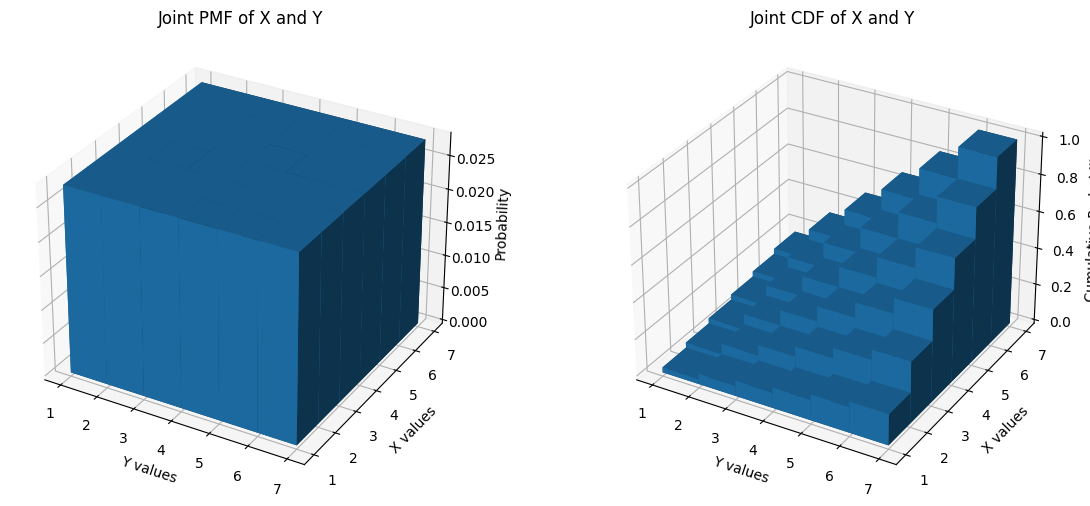

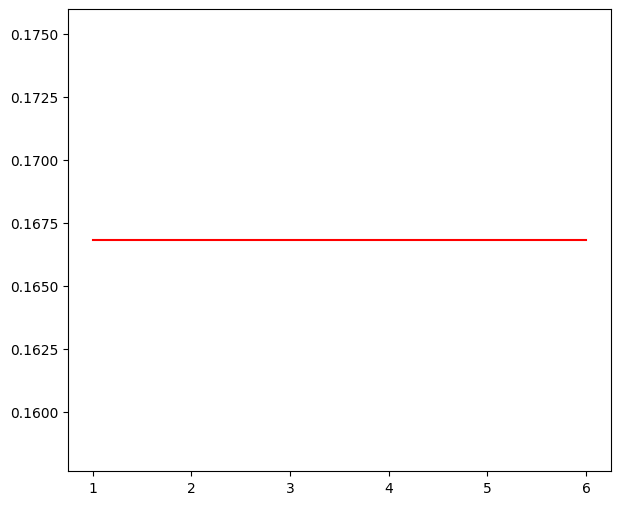

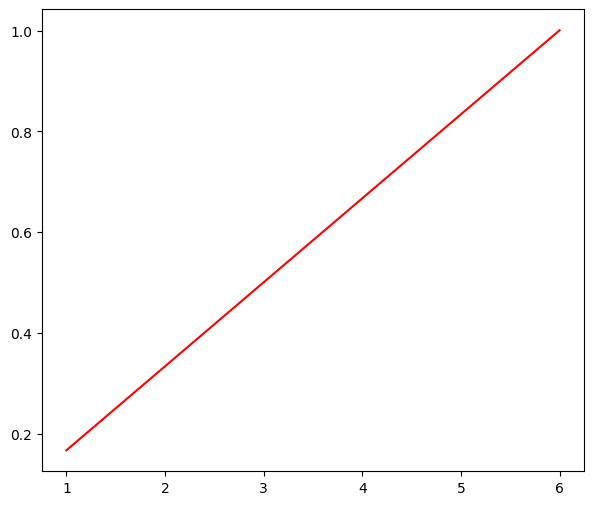

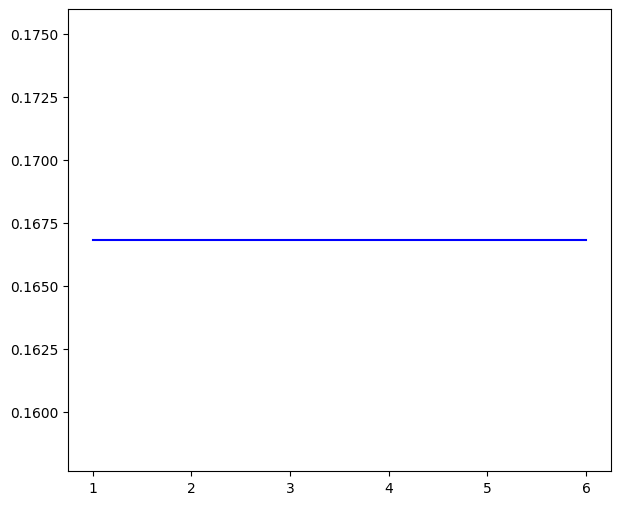

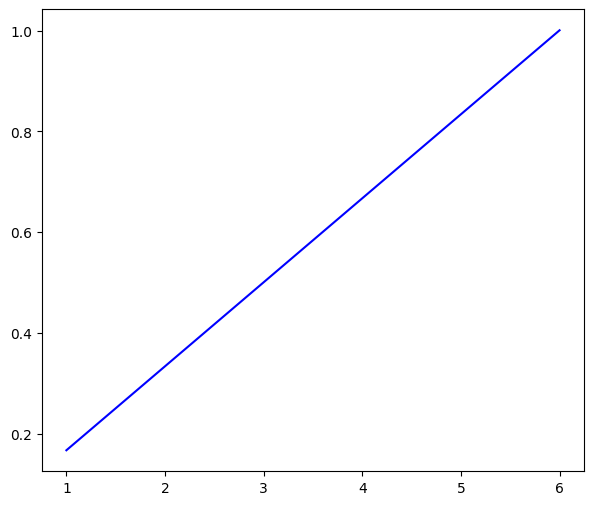

E[XY]: 12.259799999999998
E[X1Y1]: 7.846271999956134e-06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def check_independent(joint_pmf, x_values, y_values):
    pmf_x = [sum(row) for row in joint_pmf]
    pmf_y = []
    for j in range(len(y_values)):
        pmf_y.append(sum(joint_pmf[i][j] for i in range(len(x_values))))
    product_pmf = []
    for i in range(len(x_values)):
        product_pmf.append([])
        for j in range(len(y_values)):
            product_pmf[i].append(pmf_x[i] * pmf_y[j])
    independent = True
    for i in range(len(x_values)):
        for j in range(len(y_values)):
            tol = (np.e)**(-10)
            if abs(joint_pmf[i][j] - product_pmf[i][j]) > tol:
                independent = False
                break
        if not independent:
            break
    if independent:
        print("The random variables X and Y are independent")
    else:
        print("The random variables X and Y are not independent")
def expected_value(joint_pmf, x_values, y_values):
    return sum(x_values[i] * y_values[j] * joint_pmf[i][j] for i in range(len(x_values)) for j in range(len(y_values)))

def expected_value_of_product(joint_pmf, x_values, y_values, pmf_x, pmf_y):
    mean_x = sum(x_values[i] * pmf_x[i] for i in range(len(x_values)))
    mean_y = sum(y_values[j] * pmf_y[j] for j in range(len(y_values)))
    return sum((x_values[i] - mean_x) * (y_values[j] - mean_y) * joint_pmf[i][j] for i in range(len(x_values)) for j in range(len(y_values)))
def plot_3d_joint_marginal_pmf_cdf(joint_pmf, x_values, y_values):
    joint_pmf = np.array(joint_pmf)
    pmf_x = np.sum(joint_pmf, axis=1)
    pmf_y = np.sum(joint_pmf, axis=0)
    cdf_x = np.cumsum(pmf_x)
    cdf_y = np.cumsum(pmf_y)

    # Create grid for 3D plot
    X, Y = np.meshgrid(y_values, x_values)
    Z = joint_pmf.flatten()

    # Plot the joint PMF
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(121, projection='3d')
    ax.bar3d(X.flatten(), Y.flatten(), np.zeros(len(Z)), 1, 1, Z, shade=True)
    ax.set_title('Joint PMF of X and Y')
    ax.set_xlabel('Y values')
    ax.set_ylabel('X values')
    ax.set_zlabel('Probability')

    # Plot the joint CDF
    joint_cdf = np.cumsum(np.cumsum(joint_pmf, axis=0), axis=1)
    ZX = joint_cdf.flatten()
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.bar3d(X.flatten(), Y.flatten(), np.zeros(len(ZX)), 1, 1, ZX, shade=True)
    ax2.set_title('Joint CDF of X and Y')
    ax2.set_xlabel('Y values')
    ax2.set_ylabel('X values')
    ax2.set_zlabel('Cumulative Probability')
    plt.show()

    # Plot the marginal PMF of X
    fig2 = plt.figure(figsize=(7, 6))
    plt.plot(x_values,pmf_x, color='r')
    plt.subplot(1,1,1),plt.show()

    # Plot the marginal CDF of X
    fig3 = plt.figure(figsize=(7, 6))
    plt.plot(x_values, cdf_x, color='r')
    plt.subplot(1,1,1),plt.show()

    # Plot the marginal PMF of Y
    fig4 = plt.figure(figsize=(7, 6))
    plt.plot(y_values, pmf_y, color='b')
    plt.subplot(1,1,1),plt.show()

    # Plot the marginal CDF of Y
    fig5 = plt.figure(figsize=(7, 6))
    plt.plot(y_values, cdf_y, color='b')
    plt.subplot(1,1,1),plt.show()


#Change the values to check if the random variables X and Y are independent or not
#I have taken the example of rolling of two unbiased dice!!
x_values = list(map(int,input().split()))
y_values = list(map(int,input().split()))
joint_pmf = [[0.0278, 0.0278, 0.0278, 0.0278, 0.0278, 0.0278], [0.0278, 0.0278, 0.0278, 0.0278, 0.0278, 0.0278], [0.0278, 0.0278, 0.0278, 0.0278, 0.0278, 0.0278], [0.0278, 0.0278, 0.0278, 0.0278, 0.0278, 0.0278], [0.0278, 0.0278, 0.0278, 0.0278, 0.0278, 0.0278], [0.0278, 0.0278, 0.0278, 0.0278, 0.0278, 0.0278]]
result=check_independent(joint_pmf,x_values,y_values)
plot_3d_joint_marginal_pmf_cdf(joint_pmf, x_values, y_values)
joint_pmf_array = np.array(joint_pmf)
pmf_x = np.sum(joint_pmf_array, axis=1)
pmf_y = np.sum(joint_pmf_array, axis=0)
e_xy = expected_value(joint_pmf, x_values, y_values)
e_x1y1 = expected_value_of_product(joint_pmf, x_values, y_values, pmf_x, pmf_y)
print(f"E[XY]: {e_xy}")
print(f"E[X1Y1]: {e_x1y1}")